In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import re
plt.rc('font', family='Malgun Gothic')
WordCloud(colormap='Pastel1')

from konlpy.tag import Okt


In [3]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel("개선요청_후기.xlsx")

# [교과명] 컬럼 기준으로 그룹화하고, 각 그룹의 다른 컬럼들을 리스트로 합치기
grouped = df.groupby('교과명').agg({
    '제목': lambda x: list(x),
    '평점': lambda x: list(x),
    '후기': lambda x: list(x)
}).reset_index()

# 결과 확인

pd.DataFrame(grouped)


,교과명,제목,평점,후기
0,'척' 하면 '딱' 붙는 대입 진학지도,[대학 입시의 A~Z가지 모든 걸 알려주는 꿀 연수],[5점],[nan]
1,7대 표준안으로 실천하는 학교안전교육,"[몇 번을 들어도 부족하다 싶은 유익한 연수!, 알뜰한 연수, 내용이 간결해서 좋음]","[5점, 5점, 4점]",[몇 번을 들어도 부족한 듯한 유익한 연수입니다. 막상 사고를 당하면 당황해서 우왕...
2,7인의 전문의와 함께하는 메디컬 콘서트,"[내 몸이 건강해지는 힐링 연수!, 나라 사랑, 7인의 전문의와 함께하는 메디컬 콘...","[5점, 5점, 5점, 5점, 5점]","[nan, 나라 사랑의 마음을 다시 한 번 생각하고 느끼는 시간이었습니다. 자신의 ..."
3,English Grammar in Use,"[문법실력을 쌓기 위해서..., 어려운 역사는 가라, 오류가 적지 않아 아쉬웠어요....","[3점, 4점, 3점, 3점]","[3줄 요약1. 이지경선생님 강의가 좋아서 2탄도 들을 것이다.2. 연수 플랫폼, ..."
4,English Grammar in Use 2,"[잘 들었습니다., 2과정을 듣고 후기 남깁니다.]","[3점, 5점]","[English Grammar in Use 1도 듣고 2도 들었는데, 2가 조금 더..."
...,...,...,...,...
73,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기","[노션의 기승전결을 배울 수 있었습니다., 노션에 대한 완벽한 이해, 올인원이라는 ...","[5점, 4점, 5점, 4점, 5점, 5점, 5점]",[평소에 노션을 활용한 관리를 하고 싶어서 교육을 듣게 되었습니다.초중등 교사 중심...
74,학생들과 함께 나누는 기후변화 이야기,[상시 연수 비추천!!],[1점],[상시 연수의 경우 배속을 조정할 수도 없고 일정한 시간을 채워야 이수 처리가 되어...
75,한 번에 끝내는 법정연수 1,"[목적 있는 여행을 꿈꾸게하는 강의, 지리가 좋아졌어요!, 편안하게 들을 수 있는 ...","[5점, 5점, 5점]","[여행을 좋아해서 이 나라 저 나라 열심히 다니고 있었으나, 시간이 지나면 모래처럼..."
76,"행복한 학급 만들기, 학생과 교사 자존감 수업","[자존감 수업, 행복한 교사가 행복한 학교를 만든다., 학생과 교사의 자존감에 대한...","[5점, 4점, 5점, 4점, 5점, 2점]","[학생의 자존감을 키원주는 수업 방법도 좋았지만, 교사의 자존감을 강하게 하는 방법..."


In [4]:

# 필요하다면 개선 요청 포함된 후기들만 새로운 엑셀 파일로 저장
grouped.to_excel("개선요청건_교과목_그룹.xlsx", index=False)

In [10]:
plt.rcParams.update({'font.family':'Malgun Gothic'})

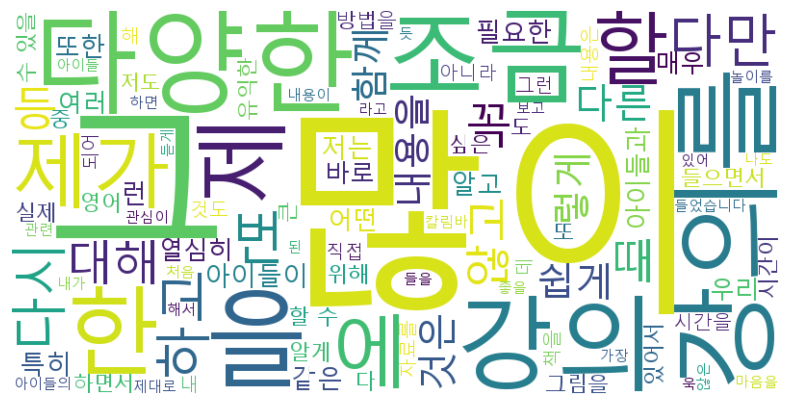

In [48]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_excel("개선요청_후기.xlsx")
text = " ".join(review for review in df["후기"])

# 불용어 패턴 생성
stopwords_pattern = re.compile(r'\b(?:그(리고|런데|래서)|렇게|어떻게|하지만|통해|듣고|연수였습니다|하는|있(는|습니다)|수업|좀|이라는|(입|합)니다|이다|에(게|서)|이랑|수( ?있는| ?있어서)|것 ( ?같습니다| ?같아요)|정말|연수(을|를|은|가|는)|좋은|잘|연수|대한|너무|많은|이|더|감사합니다|(되었|좋았)습니다)|것(이|을)\b')

# 텍스트 데이터에서 불용어 제거
text = stopwords_pattern.sub('', text)

# 워드클라우드 설정 및 생성
font_path = "C:/Windows/Fonts/malgun.ttf"
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    max_words=100, 
    stopwords=stopwords,  # 불용어 설정
    font_path=font_path
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [35]:
# 데이터 불러오기
df = pd.read_excel("개선요청_후기_결측치제거(2~200).xlsx")

In [37]:
df = pd.DataFrame(df)
df.to_excel('개선요청_최종.xlsx')

In [36]:
# [후기] 컬럼에서 결측치를 포함한 행 삭제
df = df.dropna(subset=['후기'])

In [28]:
text = " ".join(review for review in df["후기"])
tokenizer = Okt()

# 불용어 제거
stopwords_pattern = re.compile(r'\b(상시|(있|싶었)는데|(봤지|이었지)만|이지경|궁금해졌다|종이박스|做的太好了으로도|15(차시를|강을)|우리|중등에도|이름없이|고객센터|그상황에|선두주자|안녕하세요|이라는|이지유|손이었는데연수들으면서|300시간씩|칼림바|어느정도|연습을했더니|Grammar|English|현장체험학습을|세계문화유산에|2023학년도에|tistory|말씀드렸지만|되었답니다|(요청한|되었)다|사실은|조곤조곤|좋았는데칼림바까지|강추강추|티셀파|정훈쌤|(국립중앙|대한민국역사)박물관|생태환경교육이|가능했습니다주어진|있었습니다(그런데|그리고)|구국계몽운동|연수원|entry|서울시교육연수원|schoolforkids|ㅎㅎㅎ|운용(해보겠습니다|하였는가라는)|강사(님|님의|분들의)|(있었|되었|좋았|내용들이었)어요|한다|학교|https|그런데|시간을|재료소개에서부터|좋은|저의|사실|물론|조금|선생(님|님의|님들께|님들이|님들의)|그래서|scroobly|우리나라|라는|이런|다만|하지만|아이(들과|들이|들의|들에게)|학생(들과|들에게)|(되었|좋았|들었|유익했|싶|많았|좋|했|좋겠|고민이었|연습하겠|나날이었|기분이었|고생하셨|아팠|섭렵하였|재미있었|찾아보았|칼림바였|점이었|편이었|행복했|강의였|깨달았|않았|감사드리고싶)습니다|강의(를|을|는)|(연수였|신청했|시작했|유익|신청하였|시간이었|생겼|흥미로웠|일이었|대단해보였|생각되었|마찬가지었|유용했|신청완료했|얻었|수월해졌|나누겠|재밌었|인상깊었)습니다|있(는|습니다|었습니다)|(입|합|생각합|됩|사실입|느낌입|고맙습|추천드립|것입|표현방식입|감사드립|유용합|강좌입|듭|부탁드립|수업합|기대합|말씀드립)니다|에(게|서)|수( ?있는| ?있어서)|것( ?같습니다| ?같아요)|연수(을|를|은|가|는|였다|입니다|였어요)|(감사|추천)합니다|추천드려요|들었(다|네요)|(기다려지|행복해지|들어하)더라구요|있었고요|신청했는데|다행이랄까요|내용들이라현장에|하셨구요기후위기|만들어놨나요|강사선생님께서|감사드려요|되었지요)\b')
text = stopwords_pattern.sub('', text)


**정규식 노가다 작업물**

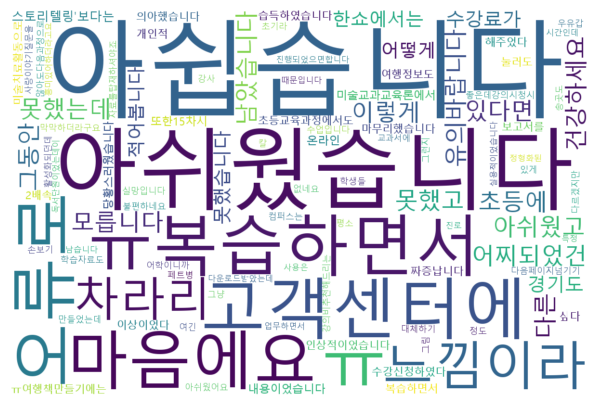

In [29]:
text = ' '.join([word for word in text.split() if len(word) >= 8])

# 워드클라우드 설정 및 생성
font_path = "C:/Windows/Fonts/malgun.ttf"
wordcloud = WordCloud(
    width=1200, 
    height=800, 
    background_color="white", 
    max_words=100, 
    font_path=font_path
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**토그나이저 활용**

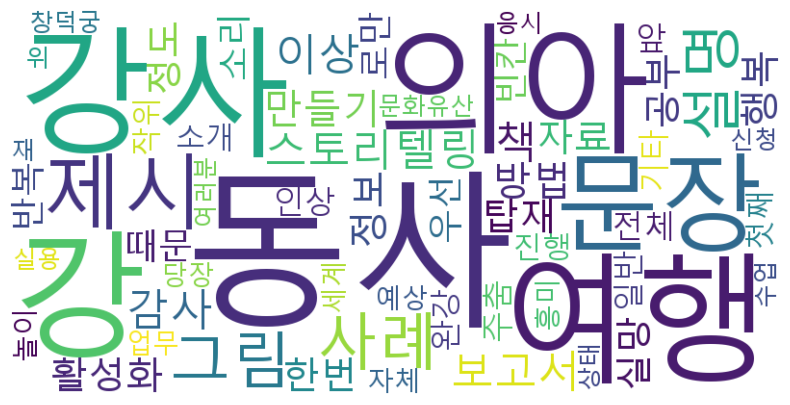

In [111]:
okt = Okt() 

# 몇글자 이상의 단어만 필터링
filtered_text = ' '.join([word for word in text.split() if len(word) >= 8])

# 형태소 분석

# tokens_with_pos = okt.pos(text)
# adjectives = [word for word, pos in tokens_with_pos if pos == 'Adjective']  ## 형용사


tokens_with_pos = okt.pos(filtered_text)
nouns = [word for word, pos in tokens_with_pos if pos == 'Noun'] ##명사


# 형용사들만을 공백으로 구분하여 문자열
noun_text = ' '.join(nouns)

# 워드클라우드 설정 및 생성
font_path = "C:/Windows/Fonts/malgun.ttf"
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    max_words=100,
    font_path=font_path
).generate(noun_text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()